## Notebook to compare cell-type fractions from single-cell modalities and the SCADEN estimated cell-type fractions from the RNAB

this is to get some idea on estimated cell-type fraction accuracy as these values are used in various analyses for the bulk modalities

In [1]:
!date

Tue Feb 28 16:43:59 UTC 2023


#### import libraries

In [2]:
from pandas import read_csv, DataFrame
from scipy.stats import linregress
import matplotlib.pyplot as plt
from matplotlib.pyplot import rc_context
from seaborn import scatterplot, lmplot

%matplotlib inline
# for white background of figures (only for docs rendering)
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
%config InlineBackend.figure_format='retina'

#### set notebook variables

In [3]:
# naming

# directories
wrk_dir = '/home/jupyter/foundin_qtl'
info_dir = f'{wrk_dir}/sample_info'

# in files
bulk_fracs_file = f'{info_dir}/foundin_RNAB_sample_info.csv'
scrn_fracs_file = f'{info_dir}/SCRN_integratedAfterBroadCellType.proportions.txt'
scat_fracs_file = f'{info_dir}/SCAT_integratedAfterBroadCellType.proportions.txt'

# variables
DEBUG = False
dpi_value = 50
cell_types = ['DopaminergicNeurons',
              'EarlyneuronProgenitor',
              'Ependymal-likeCells',
              'ImmatureDopaminergicNeurons',
              'LateneuronProgenitor',
              'Neuroepithelial-likeCells',
              'ProliferatingFloorPlateProgenitors',
              'DAn']
icc_types = ['TH_Pel-Freez_ICC', 'MAP2_Santa_Cruz_ICC']

### load data

#### load the bulk fractions estimated by SCADEN

In [4]:
bulk_df = read_csv(bulk_fracs_file)
# modify sampleid to be consistent with others
bulk_df.sampleid = bulk_df.PPMI_ID + '_' + bulk_df.cdi.astype('str') + '_' + bulk_df.day
bulk_df = bulk_df[['sampleid'] + cell_types + icc_types]
print(f'bulk info shape {bulk_df.shape}')
if DEBUG:
    display(bulk_df.head())

bulk info shape (305, 11)


In [5]:
print(bulk_df.sampleid.nunique())
print(bulk_df.index.nunique())
# with this ID formatting the batch control sample will be duplicate, keep first
bulk_df = bulk_df.drop_duplicates(subset=['sampleid'], keep='first')
print(f'bulk info shape {bulk_df.shape}')
if DEBUG:
    display(bulk_df.head())

288
305
bulk info shape (288, 11)


#### load the SCRN cell-type proportions

In [6]:
scrn_df = read_csv(scrn_fracs_file, sep='\t', index_col=0)
# strip the spaces from cell-types names
scrn_df.columns = scrn_df.columns.str.replace(' ', '')
# create combined DAn fraction
scrn_df['DAn'] = scrn_df.DopaminergicNeurons + scrn_df.ImmatureDopaminergicNeurons
# add modality to col name
scrn_df.columns = [f'SCRN_{x}' for x in scrn_df.columns]
# create sampleid column
scrn_df.insert(0, 'sampleid', scrn_df.index.str.replace('SCRN_', ''))
print(f'bulk info shape {scrn_df.shape}')
if DEBUG:
    display(scrn_df.head())

bulk info shape (83, 9)


In [7]:
print(scrn_df.sampleid.nunique())
print(scrn_df.index.nunique())

83
83


#### load the SCAT cell-type proportions

In [8]:
scat_df = read_csv(scat_fracs_file, sep='\t', index_col=0)
# strip the spaces from cell-types names
scat_df.columns = scat_df.columns.str.replace(' ', '')
# create combined DAn fraction
scat_df['DAn'] = scat_df.DopaminergicNeurons + scat_df.ImmatureDopaminergicNeurons
# add modality to col name
scat_df.columns = [f'SCAT_{x}' for x in scat_df.columns]
# create sampleid column
scat_df.insert(0, 'sampleid', scat_df.index.str.replace('SCAT_', ''))
print(f'bulk info shape {scat_df.shape}')
if DEBUG:
    display(scat_df.head())

bulk info shape (29, 9)


In [9]:
print(scat_df.sampleid.nunique())
print(scat_df.index.nunique())

29
29


### merge and plot the single-cell modalities

In [10]:
merged = scrn_df.merge(scat_df, how='inner', left_on='sampleid', right_on='sampleid')
print(f'merged shape is {merged.shape}')
if DEBUG:
    display(merged.head())

merged shape is (29, 17)


#### visualize

DopaminergicNeurons
LinregressResult(slope=0.49020091478782896, intercept=0.10721257347131376, rvalue=0.5099264114252885, pvalue=0.004715689705116027, stderr=0.15914509890153983, intercept_stderr=0.043457105169917)
R-squared: 0.260


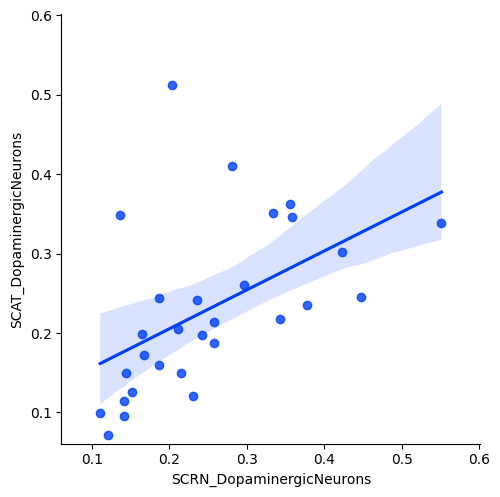

EarlyneuronProgenitor
LinregressResult(slope=0.3682932900464642, intercept=0.03600689517878726, rvalue=0.6206106237530818, pvalue=0.00032833151727026044, stderr=0.08955186653000076, intercept_stderr=0.025710146701851937)
R-squared: 0.385


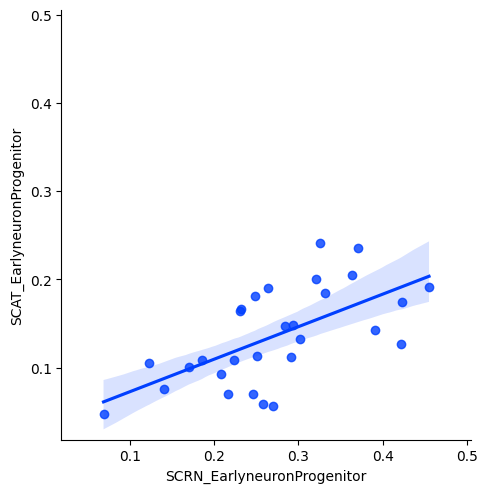

Ependymal-likeCells
LinregressResult(slope=1.4351405307539145, intercept=0.010155691381029387, rvalue=0.6104196253471587, pvalue=0.0004373955645343101, stderr=0.358386896497698, intercept_stderr=0.006289250612820265)
R-squared: 0.373


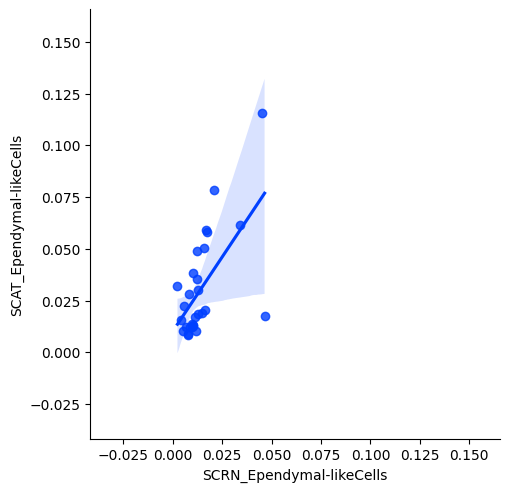

ImmatureDopaminergicNeurons
LinregressResult(slope=1.4470438200757834, intercept=0.13419328812704742, rvalue=0.9132337040007447, pvalue=4.901494417981297e-12, stderr=0.12424456788434027, intercept_stderr=0.020372128149081275)
R-squared: 0.834


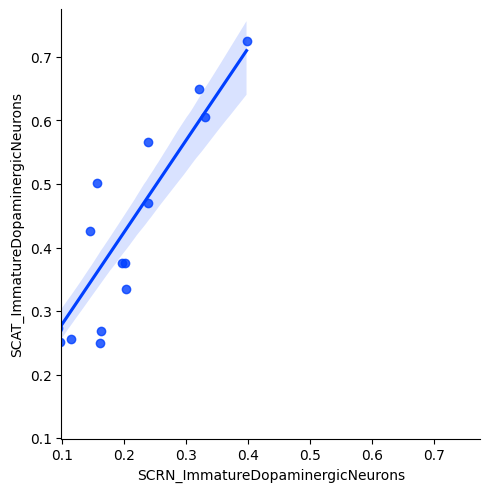

LateneuronProgenitor
LinregressResult(slope=0.29828732928450663, intercept=0.004258149479164336, rvalue=0.5638449940107761, pvalue=0.0014453210945669297, stderr=0.0840834412308699, intercept_stderr=0.022599273751343556)
R-squared: 0.318


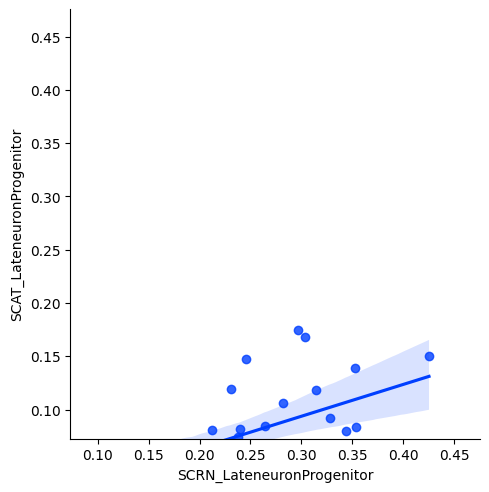

Neuroepithelial-likeCells
LinregressResult(slope=0.5565164697966598, intercept=0.040431917515944236, rvalue=0.42588529246631296, pvalue=0.021250397937356724, stderr=0.2275333851566711, intercept_stderr=0.007237178357553698)
R-squared: 0.181


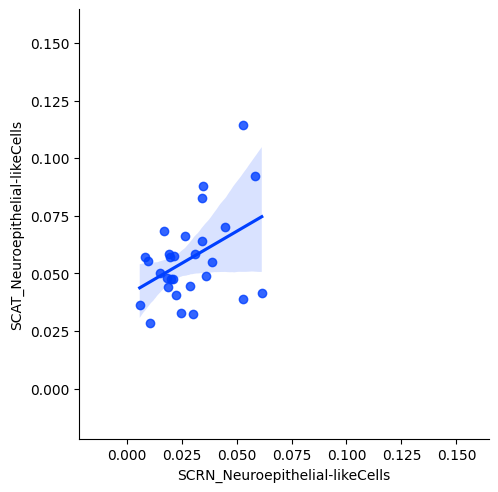

ProliferatingFloorPlateProgenitors
LinregressResult(slope=1.1095324247803415, intercept=0.09029317793268787, rvalue=0.2676375581579681, pvalue=0.16042804464233956, stderr=0.7687261213585824, intercept_stderr=0.03707129206219097)
R-squared: 0.072


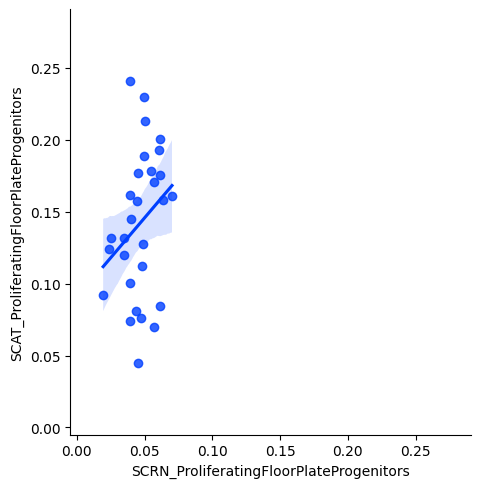

DAn
LinregressResult(slope=0.6298678312534044, intercept=0.31365834586840513, rvalue=0.4746760019043942, pvalue=0.009273342981770523, stderr=0.2247668181124392, intercept_stderr=0.08878372337301574)
R-squared: 0.225


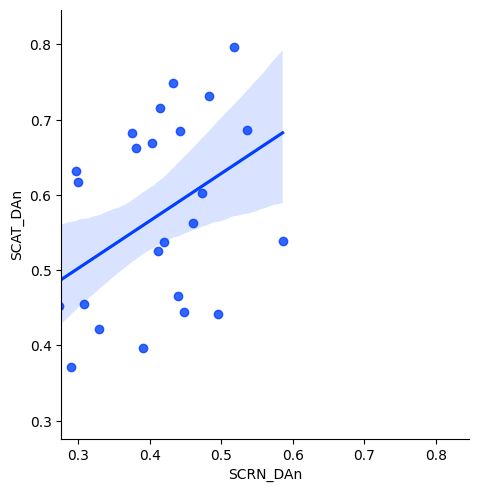

In [11]:
for cell_type in cell_types:
    print(cell_type)
    results = linregress(merged[f'SCRN_{cell_type}'], merged[f'SCAT_{cell_type}'])
    print(results)
    print(f"R-squared: {results.rvalue**2:.3f}")
    if merged[f'SCRN_{cell_type}'].max() > merged[f'SCAT_{cell_type}'].max():
        max_value = merged[f'SCRN_{cell_type}'].max() + 0.05
    else:
        max_value = merged[f'SCAT_{cell_type}'].max() + 0.05
    if merged[f'SCRN_{cell_type}'].min() > merged[f'SCAT_{cell_type}'].min():
        min_value = merged[f'SCRN_{cell_type}'].min() - 0.05
    else:
        min_value = merged[f'SCAT_{cell_type}'].min() - 0.05 
    with rc_context({'figure.figsize': (9, 9), 'figure.dpi': dpi_value}):
        plt.style.use('seaborn-bright')
        # scatterplot(data=merged, x='SCRN_DopaminergicNeurons', y='SCAT_DopaminergicNeurons')
        lmplot(data=merged, x=f'SCRN_{cell_type}', y=f'SCAT_{cell_type}')
        plt.xlim([min_value, max_value])
        plt.ylim([min_value, max_value])
        plt.show()

### merge and plot the SCRN and RNAB modalities

In [12]:
merged = bulk_df.merge(scrn_df, how='inner', left_on='sampleid', right_on='sampleid')
print(f'merged shape is {merged.shape}')
if DEBUG:
    display(merged.head())

merged shape is (68, 19)


#### visualize

DopaminergicNeurons
LinregressResult(slope=0.7444769262548305, intercept=0.15932019068585007, rvalue=0.3689828054258619, pvalue=0.001959203558697836, stderr=0.23083025919592146, intercept_stderr=0.058372232358658314)
R-squared: 0.136


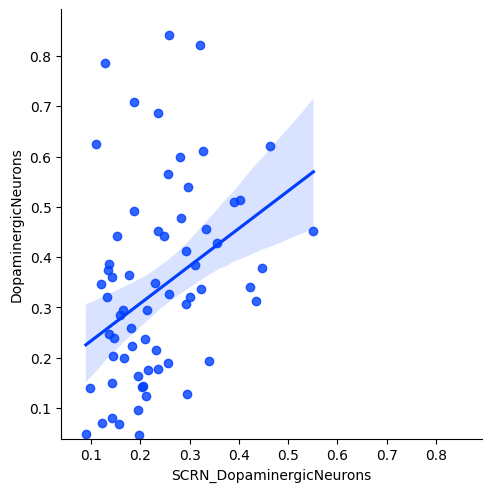

EarlyneuronProgenitor
LinregressResult(slope=0.6439240759626854, intercept=-0.030027857981737738, rvalue=0.4694133247450669, pvalue=5.387666046621118e-05, stderr=0.1490930636077885, intercept_stderr=0.04684547384299912)
R-squared: 0.220


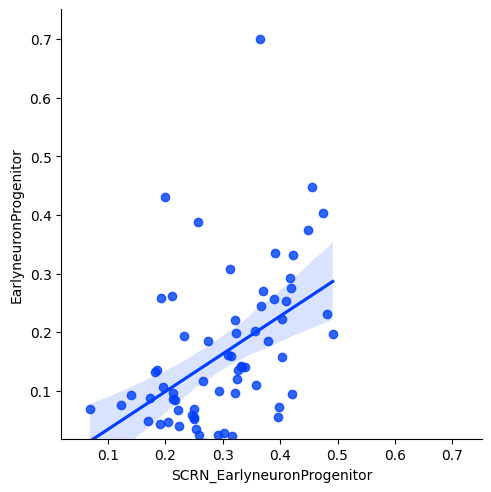

Ependymal-likeCells
LinregressResult(slope=0.046953875665008714, intercept=0.015516020484926969, rvalue=0.0873024761645113, pvalue=0.4789943616217761, stderr=0.0659495050787048, intercept_stderr=0.0012694777909172076)
R-squared: 0.008


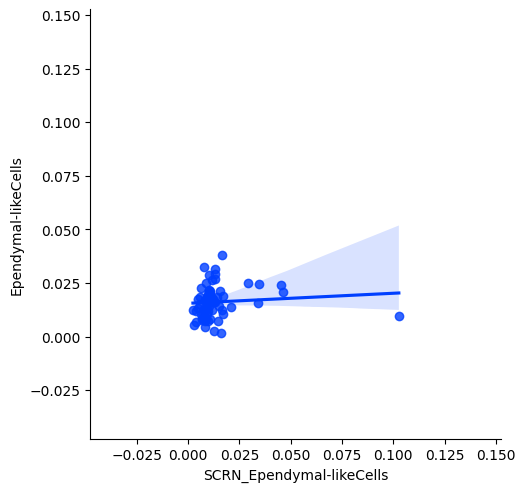

ImmatureDopaminergicNeurons
LinregressResult(slope=0.740118047208356, intercept=0.06263357693585858, rvalue=0.6048910703766212, pvalue=4.674646190336237e-08, stderr=0.11993144214614716, intercept_stderr=0.017377787779809716)
R-squared: 0.366


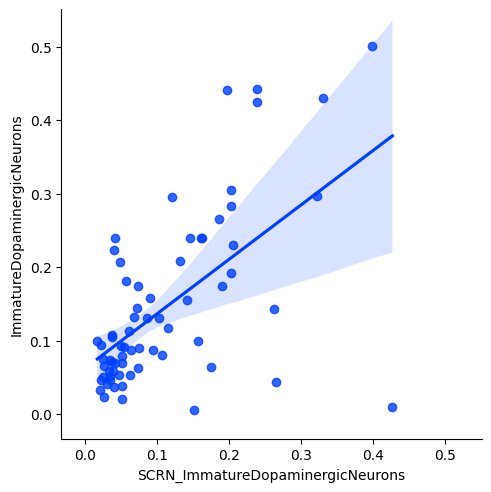

LateneuronProgenitor
LinregressResult(slope=0.9670421244036854, intercept=-0.052823626336581386, rvalue=0.47419945574779027, pvalue=4.407667218971304e-05, stderr=0.22100444689570456, intercept_stderr=0.06438653002316874)
R-squared: 0.225


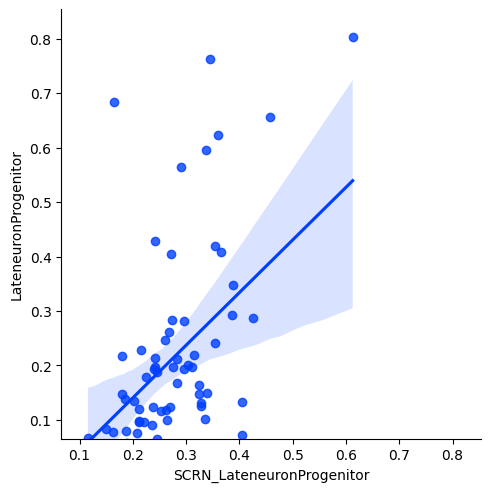

Neuroepithelial-likeCells
LinregressResult(slope=0.9354433224534761, intercept=0.059530216787808114, rvalue=0.33868184828807785, pvalue=0.004727003291734481, stderr=0.3198876689519463, intercept_stderr=0.008723519176433539)
R-squared: 0.115


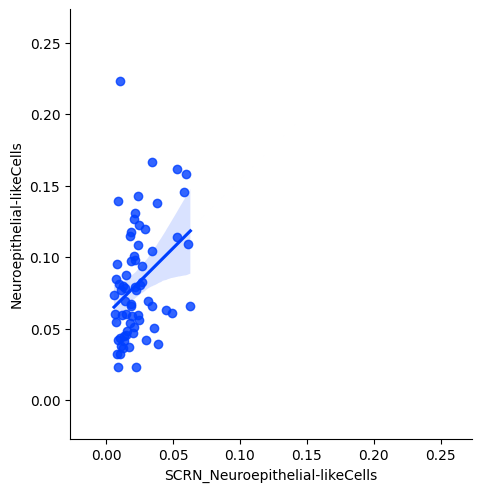

ProliferatingFloorPlateProgenitors
LinregressResult(slope=0.46386493243382615, intercept=0.027696112971780148, rvalue=0.24452559626118897, pvalue=0.04446868640720024, stderr=0.22641596225344046, intercept_stderr=0.010497537821303955)
R-squared: 0.060


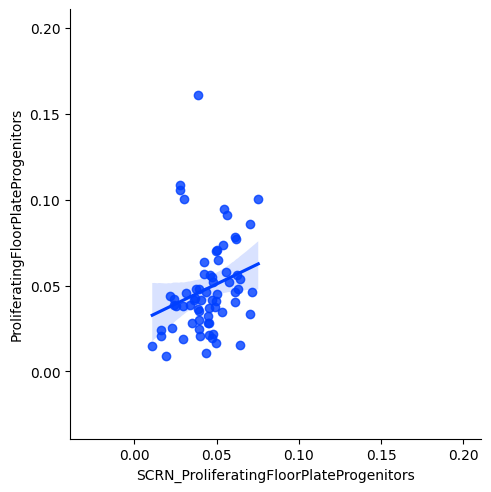

DAn
LinregressResult(slope=0.9804283669073481, intercept=0.14066682133736846, rvalue=0.45097404326196616, pvalue=0.00011362683491450372, stderr=0.23884635337122356, intercept_stderr=0.08563058714981203)
R-squared: 0.203


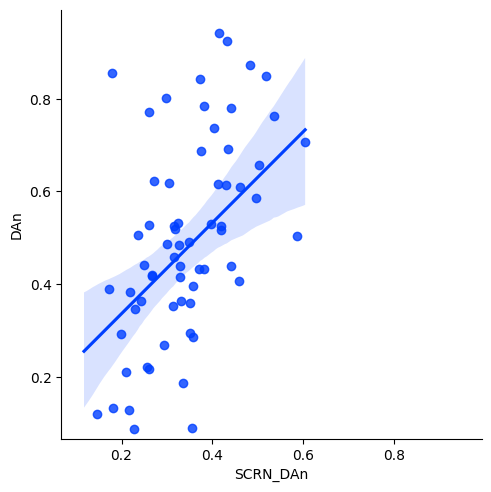

In [13]:
for cell_type in cell_types:
    print(cell_type)
    results = linregress(merged[f'SCRN_{cell_type}'], merged[cell_type])
    print(results)
    print(f"R-squared: {results.rvalue**2:.3f}")    
    if merged[f'SCRN_{cell_type}'].max() > merged[cell_type].max():
        max_value = merged[f'SCRN_{cell_type}'].max() + 0.05
    else:
        max_value = merged[cell_type].max() + 0.05
    if merged[f'SCRN_{cell_type}'].min() > merged[cell_type].min():
        min_value = merged[f'SCRN_{cell_type}'].min() - 0.05
    else:
        min_value = merged[cell_type].min() - 0.05 
    with rc_context({'figure.figsize': (9, 9), 'figure.dpi': dpi_value}):
        plt.style.use('seaborn-bright')
        lmplot(data=merged, x=f'SCRN_{cell_type}', y=cell_type)
        plt.xlim([min_value, max_value])
        plt.ylim([min_value, max_value])
        plt.show()

### compare SCRN fractions with TH ICC values

In [14]:
def compare_ICC(df: DataFrame, icc_type: str):
    df[icc_type].fillna(0, inplace=True)
    for cell_type in cell_types:
        print(cell_type)
        results = linregress(df[f'SCRN_{cell_type}'], df[icc_type])
        print(results)
        print(f'R-squared: {results.rvalue**2:.3f}')    
        with rc_context({'figure.figsize': (9, 9), 'figure.dpi': dpi_value}):
            plt.style.use('seaborn-bright')
            lmplot(data=df, x=f'SCRN_{cell_type}', y=icc_type)
            plt.show()    

DopaminergicNeurons
LinregressResult(slope=44.061582716496396, intercept=4.933860448202115, rvalue=0.6243461222246997, pvalue=1.2764301336644335e-08, stderr=6.78571996173523, intercept_stderr=1.715969230840744)
R-squared: 0.390


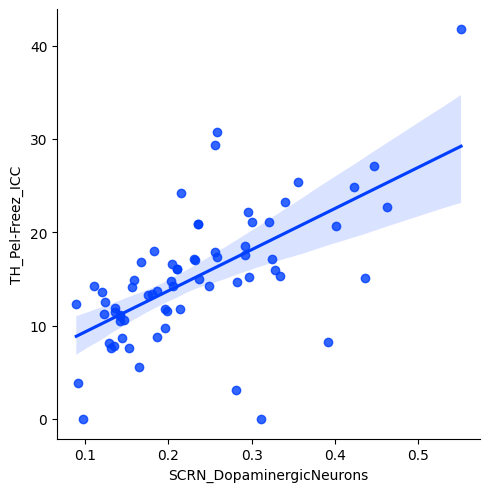

EarlyneuronProgenitor
LinregressResult(slope=-18.016664536811138, intercept=20.575966881107643, rvalue=-0.24202726145584447, pvalue=0.04675901999140543, stderr=8.890588201067342, intercept_stderr=2.7934486484066046)
R-squared: 0.059


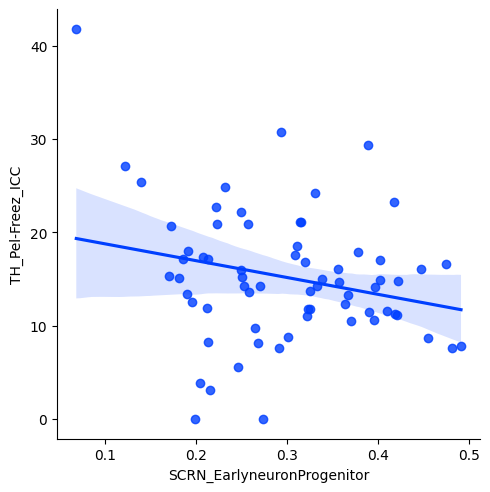

Ependymal-likeCells
LinregressResult(slope=-114.77324245842057, intercept=16.728270443339895, rvalue=-0.22383984525060965, pvalue=0.06651037629840352, stderr=61.5133320732944, intercept_stderr=1.1840848361055816)
R-squared: 0.050


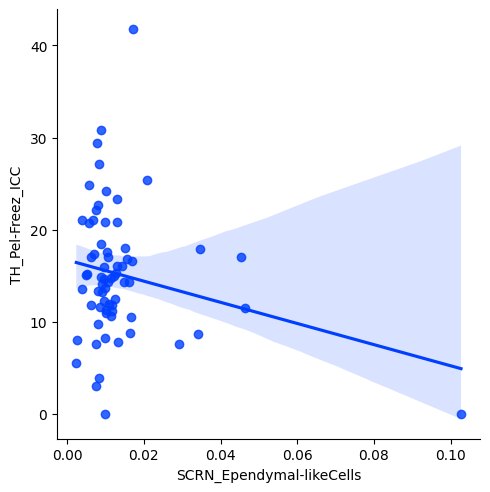

ImmatureDopaminergicNeurons
LinregressResult(slope=-10.793358037304339, intercept=16.36388579641676, rvalue=-0.14487658720406874, pvalue=0.23849182844106945, stderr=9.073610755406776, intercept_stderr=1.3147451517502107)
R-squared: 0.021


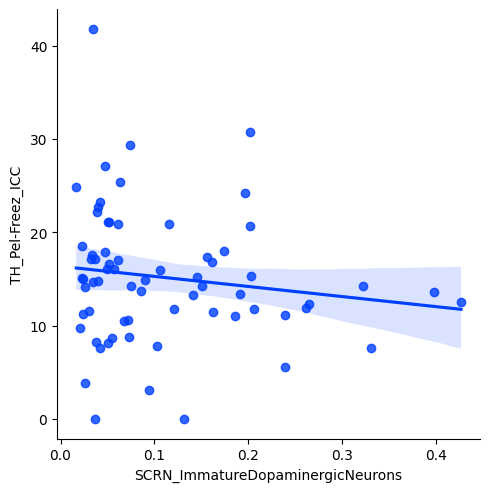

LateneuronProgenitor
LinregressResult(slope=-16.729683947643288, intercept=19.811767830962882, rvalue=-0.21443532850940256, pvalue=0.07909105271755348, stderr=9.37988685026623, intercept_stderr=2.7326978021559913)
R-squared: 0.046


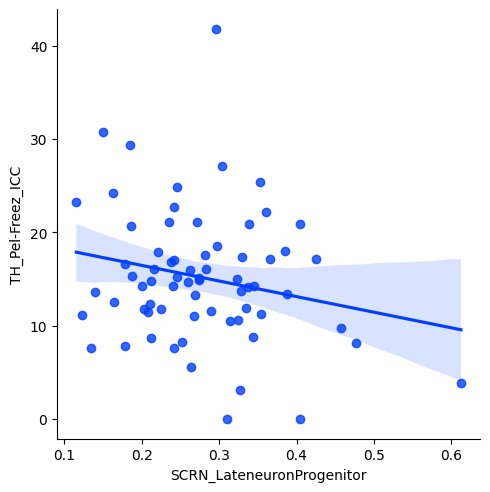

Neuroepithelial-likeCells
LinregressResult(slope=-58.98672958743818, intercept=16.543152450235567, rvalue=-0.12076273911909491, pvalue=0.32660827208703747, stderr=59.68418661727985, intercept_stderr=1.6276218092166972)
R-squared: 0.015


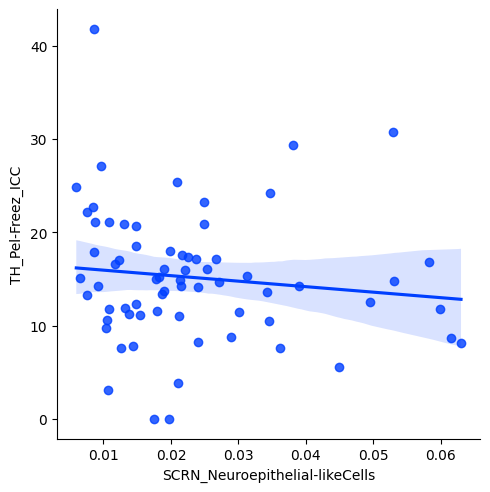

ProliferatingFloorPlateProgenitors
LinregressResult(slope=-52.0272706900822, intercept=17.469343042175453, rvalue=-0.10665155304818401, pvalue=0.3866883855702965, stderr=59.70459879226763, intercept_stderr=2.768140892937791)
R-squared: 0.011


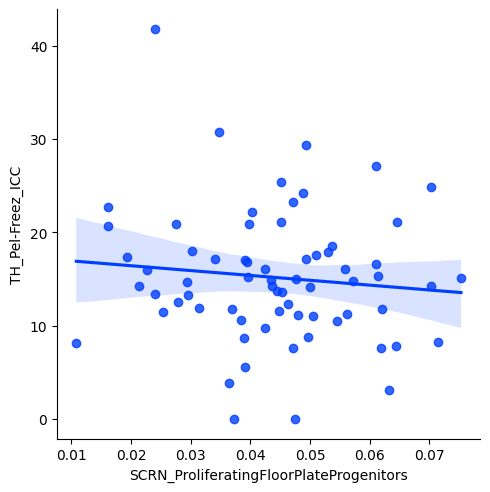

DAn
LinregressResult(slope=30.292413954774517, intercept=4.802083685910359, rvalue=0.45725901062409247, pvalue=8.853033331446276e-05, stderr=7.252109093058861, intercept_stderr=2.600007707666095)
R-squared: 0.209


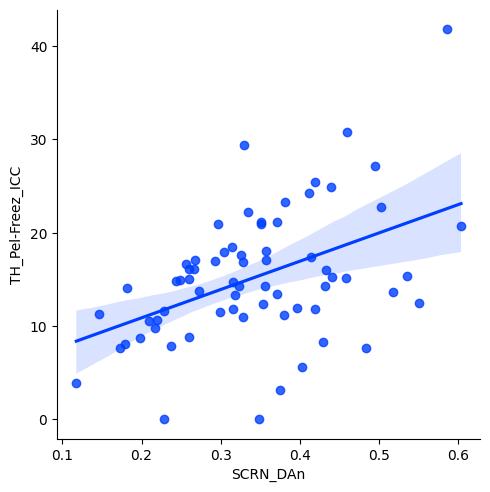

In [15]:
compare_ICC(merged, 'TH_Pel-Freez_ICC')

### compare SCRN fractions with MAP2 ICC values

DopaminergicNeurons
LinregressResult(slope=53.980907873514816, intercept=59.980943001997204, rvalue=0.3103771421031744, pvalue=0.00999677657402771, stderr=20.350845870045873, intercept_stderr=5.146311007749149)
R-squared: 0.096


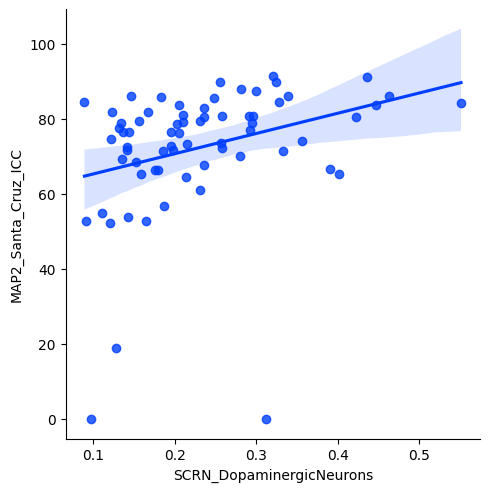

EarlyneuronProgenitor
LinregressResult(slope=28.978265513917584, intercept=63.84478332548632, rvalue=0.15795977333454284, pvalue=0.19826363666088723, stderr=22.29805969173593, intercept_stderr=7.006115152256361)
R-squared: 0.025


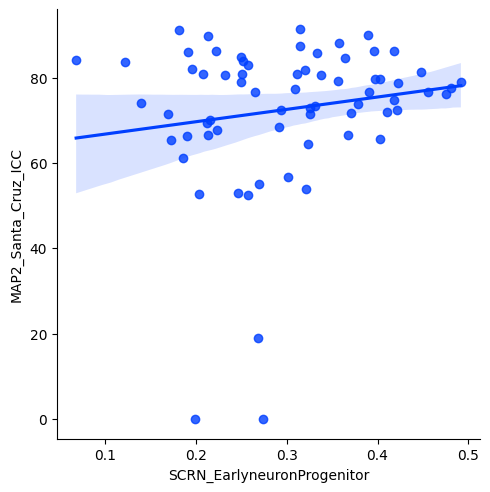

Ependymal-likeCells
LinregressResult(slope=-483.1807394698012, intercept=79.06229160183521, rvalue=-0.3823759596570051, pvalue=0.0012912209888905348, stderr=143.72166795142618, intercept_stderr=2.7665327483530553)
R-squared: 0.146


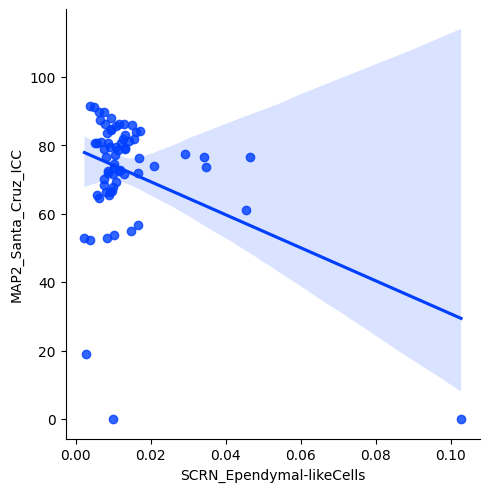

ImmatureDopaminergicNeurons
LinregressResult(slope=-27.22465174983306, intercept=75.52449127688982, rvalue=-0.14828191164219648, pvalue=0.22751736425025182, stderr=22.349838341069184, intercept_stderr=3.238439734017923)
R-squared: 0.022


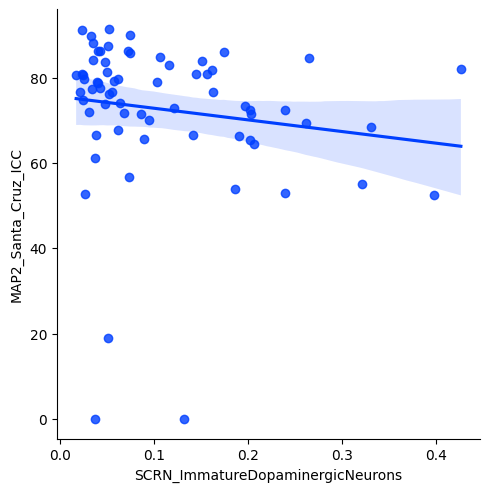

LateneuronProgenitor
LinregressResult(slope=-54.53126396441148, intercept=87.63840116867453, rvalue=-0.28362100083546843, pvalue=0.019088997785919576, stderr=22.694731085192767, intercept_stderr=6.611789965810438)
R-squared: 0.080


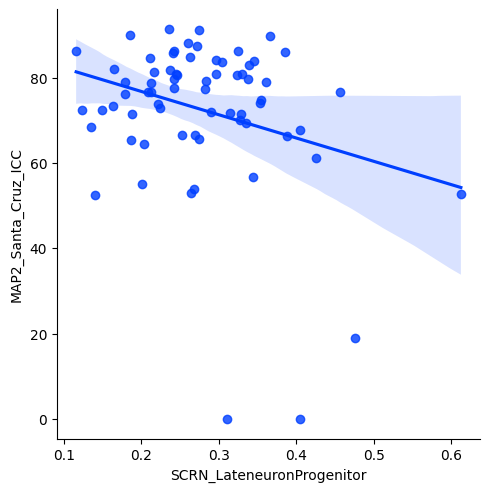

Neuroepithelial-likeCells
LinregressResult(slope=-247.82447818340947, intercept=78.27133408624915, rvalue=-0.20587663313892976, pvalue=0.09211929970083826, stderr=144.997529538975, intercept_stderr=3.9541653281382008)
R-squared: 0.042


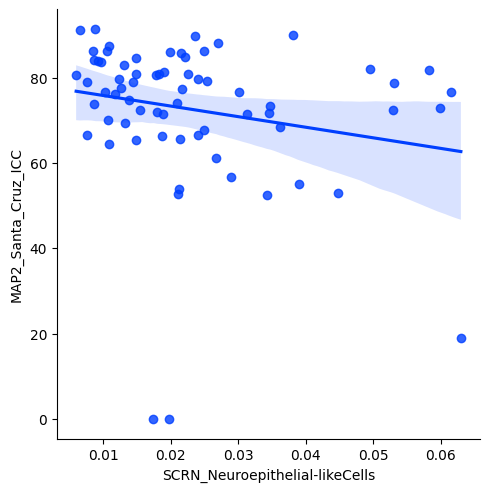

ProliferatingFloorPlateProgenitors
LinregressResult(slope=160.09478898844205, intercept=65.4739401471848, rvalue=0.13316728831091906, pvalue=0.27898738687348185, stderr=146.6635971394575, intercept_stderr=6.799903340103605)
R-squared: 0.018


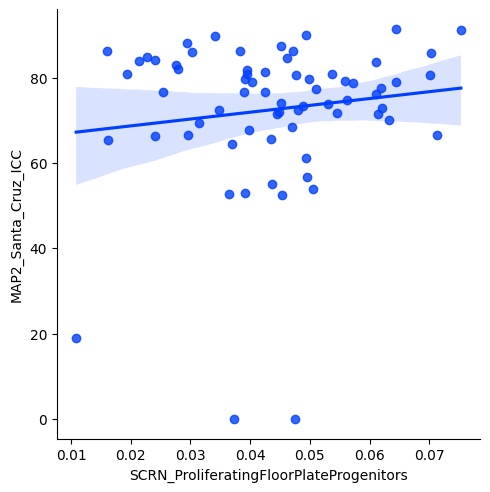

DAn
LinregressResult(slope=26.040646308978513, intercept=63.61114792481265, rvalue=0.1595013518427315, pvalue=0.19386420330170817, stderr=19.838990166670985, intercept_stderr=7.112624297809604)
R-squared: 0.025


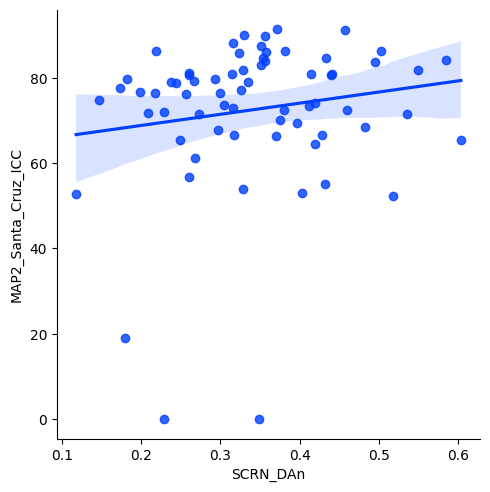

In [16]:
compare_ICC(merged, 'MAP2_Santa_Cruz_ICC')

### compare SCADEN estimated fractions with TH ICC values

In [17]:
def compare_scaden(df: DataFrame, icc_type: str):
    df[icc_type].fillna(0, inplace=True)
    for cell_type in cell_types:
        print(cell_type)
        results = linregress(df[cell_type], df[icc_type])
        print(results)
        print(f'R-squared: {results.rvalue**2:.3f}')    
        with rc_context({'figure.figsize': (9, 9), 'figure.dpi': dpi_value}):
            plt.style.use('seaborn-bright')
            lmplot(data=df, x=cell_type, y=icc_type)
            plt.show()    

DopaminergicNeurons
LinregressResult(slope=3.805836816956934, intercept=13.911478098561128, rvalue=0.10880794351392162, pvalue=0.37710408539341267, stderr=4.279878211374176, intercept_stderr=1.662112664849428)
R-squared: 0.012


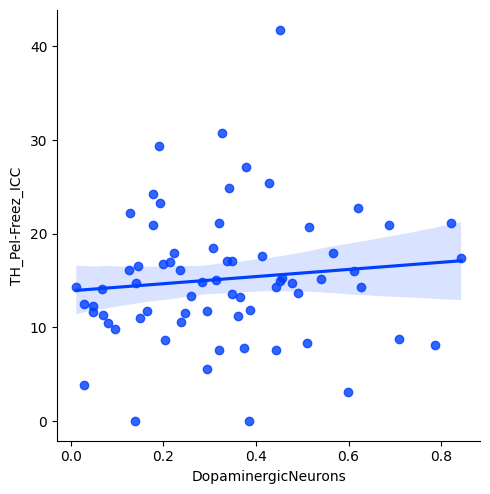

EarlyneuronProgenitor
LinregressResult(slope=-5.217564028111203, intercept=16.026686643038435, rvalue=-0.09614726436233374, pvalue=0.43541396093236506, stderr=6.648783294803855, intercept_stderr=1.3837380331939606)
R-squared: 0.009


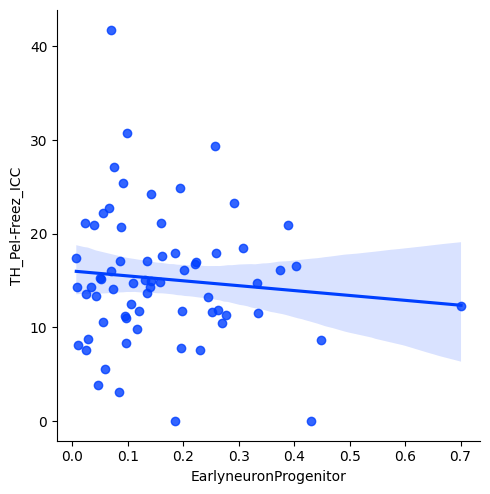

Ependymal-likeCells
LinregressResult(slope=60.56747324859378, intercept=14.198253581451533, rvalue=0.06353032628073146, pvalue=0.6067681360418962, stderr=117.11383447833849, intercept_stderr=2.0790677279630345)
R-squared: 0.004


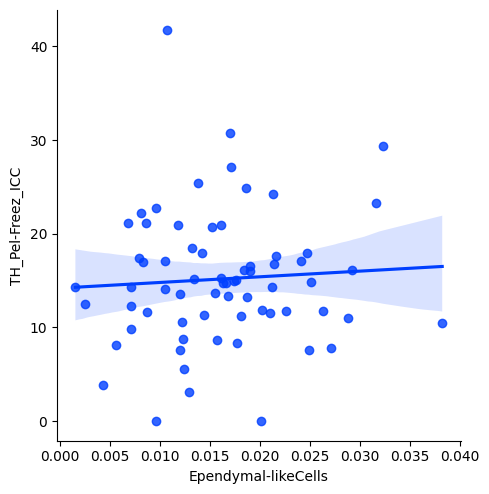

ImmatureDopaminergicNeurons
LinregressResult(slope=-3.64673915483075, intercept=15.70180729164807, rvalue=-0.059892183182031745, pvalue=0.6275607349090367, stderr=7.481389478706786, intercept_stderr=1.3808171739548034)
R-squared: 0.004


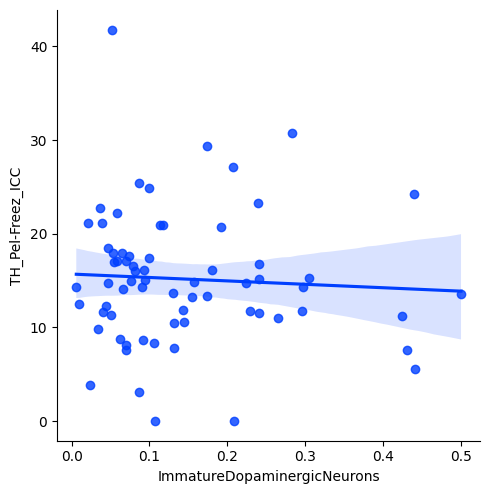

LateneuronProgenitor
LinregressResult(slope=-1.5291160076170234, intercept=15.505406301150881, rvalue=-0.03996992901762772, pvalue=0.7462264257051736, stderr=4.7053062930493965, intercept_stderr=1.330836264549126)
R-squared: 0.002


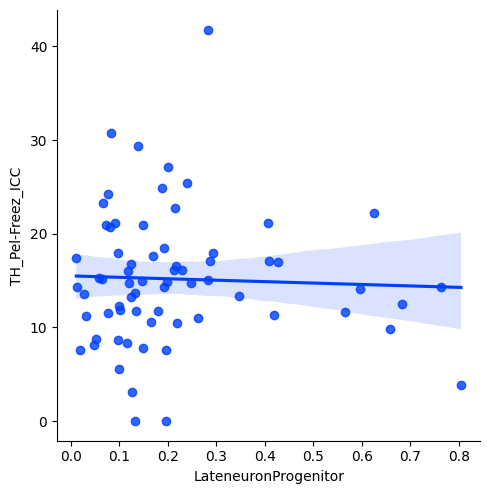

Neuroepithelial-likeCells
LinregressResult(slope=24.47852395613495, intercept=13.188721578316834, rvalue=0.13841699653377482, pvalue=0.2602997745787761, stderr=21.558725578472387, intercept_stderr=1.948911760095755)
R-squared: 0.019


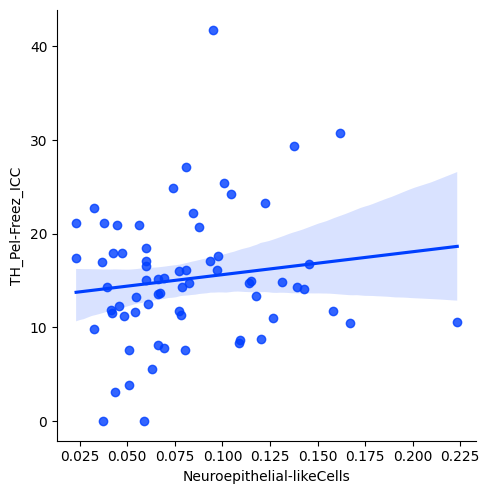

ProliferatingFloorPlateProgenitors
LinregressResult(slope=-10.576652145390762, intercept=15.685619132848316, rvalue=-0.04112932446668425, pvalue=0.739123663520905, stderr=31.626929824665414, intercept_stderr=1.7505732658679527)
R-squared: 0.002


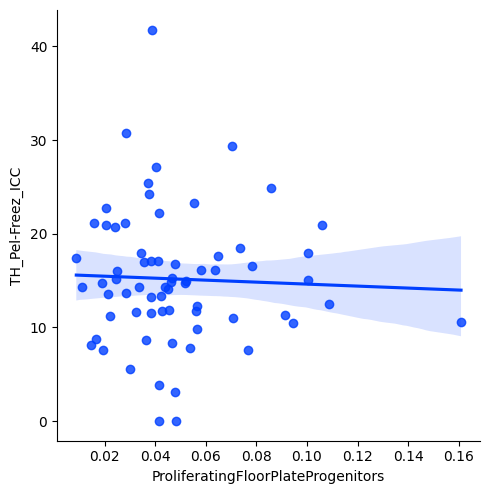

DAn
LinregressResult(slope=1.9752109027293008, intercept=14.235403512751285, rvalue=0.06481957600305582, pvalue=0.5994727382929778, stderr=3.7430104314243717, intercept_stderr=1.9811308889458794)
R-squared: 0.004


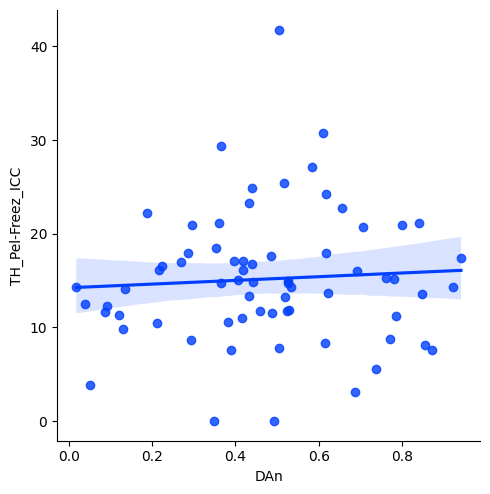

In [18]:
compare_scaden(merged, 'TH_Pel-Freez_ICC')

### compare SCADEN estimated fractions with MAP2 ICC values

DopaminergicNeurons
LinregressResult(slope=-7.679233342716946, intercept=75.0818523900398, rvalue=-0.08908662852167124, pvalue=0.4700205607777661, stderr=10.568251130658911, intercept_stderr=4.104234555762633)
R-squared: 0.008


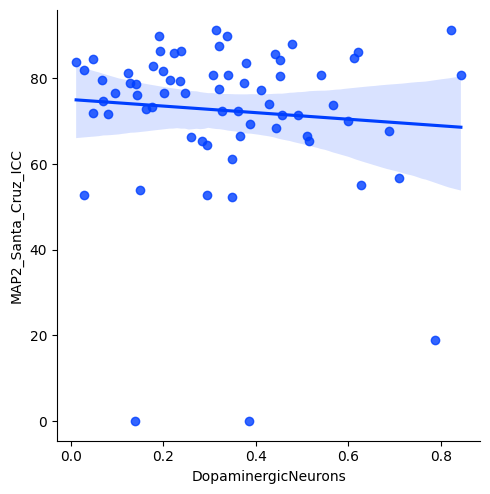

EarlyneuronProgenitor
LinregressResult(slope=6.538395929988853, intercept=71.4639626082825, rvalue=0.048890511419756824, pvalue=0.6921612039011782, stderr=16.442013599641943, intercept_stderr=3.42189518763494)
R-squared: 0.002


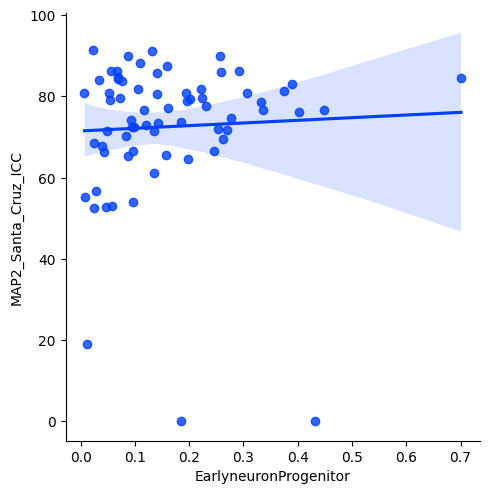

Ependymal-likeCells
LinregressResult(slope=163.78395383256483, intercept=69.88415944553272, rvalue=0.06971033995103172, pvalue=0.5721577422262389, stderr=288.4990427159088, intercept_stderr=5.121590048952042)
R-squared: 0.005


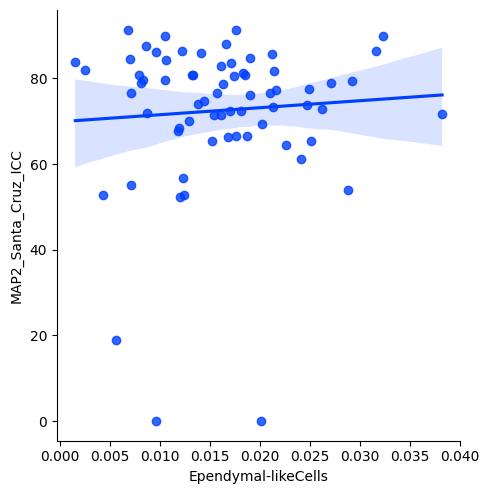

ImmatureDopaminergicNeurons
LinregressResult(slope=-34.83610100220177, intercept=77.54778069191822, rvalue=-0.23215562198163314, pvalue=0.0567764288360086, stderr=17.965849363217917, intercept_stderr=3.315901867697501)
R-squared: 0.054


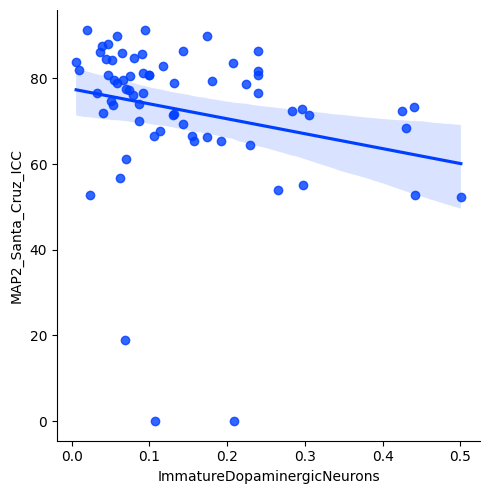

LateneuronProgenitor
LinregressResult(slope=13.642199721957203, intercept=69.5947706590438, rvalue=0.14469767919874305, pvalue=0.239078322651619, stderr=11.483019343115464, intercept_stderr=3.247826521072921)
R-squared: 0.021


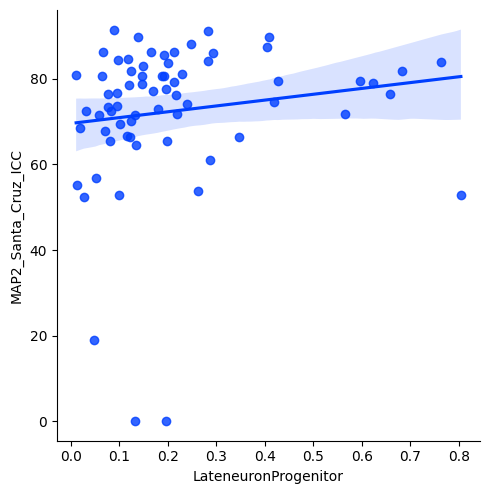

Neuroepithelial-likeCells
LinregressResult(slope=53.43124555335796, intercept=68.1905919225569, rvalue=0.12259809252657297, pvalue=0.31925499400703844, stderr=53.24159462594944, intercept_stderr=4.813047483492125)
R-squared: 0.015


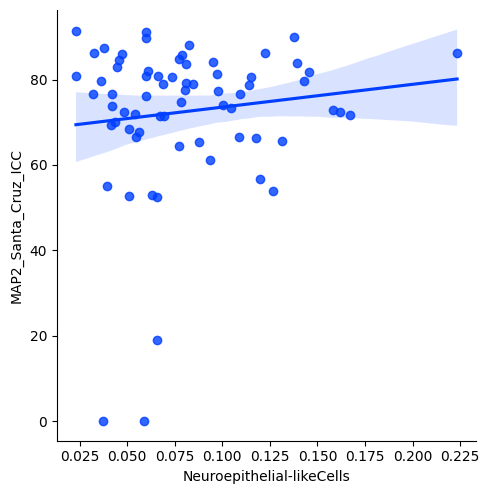

ProliferatingFloorPlateProgenitors
LinregressResult(slope=148.3327051800989, intercept=65.38883647464374, rvalue=0.23405854041570895, pvalue=0.05472037162290848, stderr=75.841362561404, intercept_stderr=4.197873852537219)
R-squared: 0.055


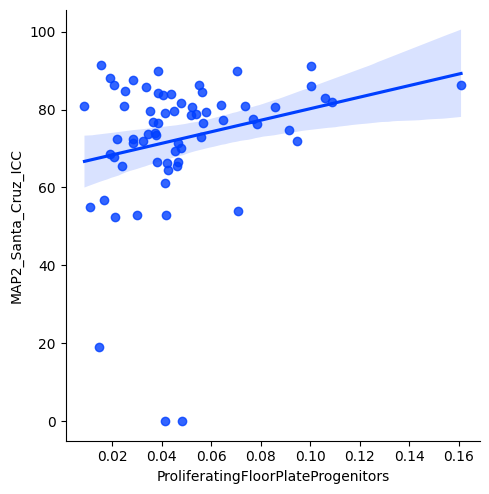

DAn
LinregressResult(slope=-14.553645539499131, intercept=79.46333291032258, rvalue=-0.19379774752858772, pvalue=0.11330258870971657, stderr=9.068563150798743, intercept_stderr=4.799882582632008)
R-squared: 0.038


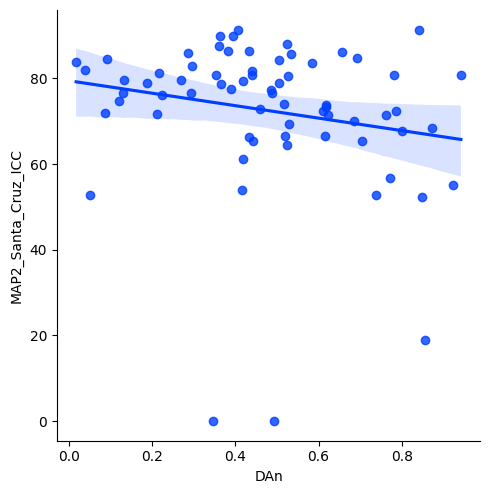

In [19]:
compare_scaden(merged, 'MAP2_Santa_Cruz_ICC')

In [20]:
!date

Tue Feb 28 16:47:04 UTC 2023
